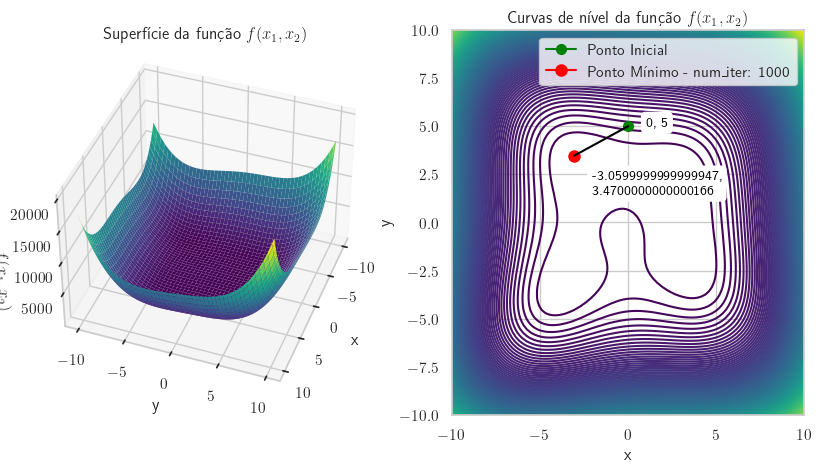

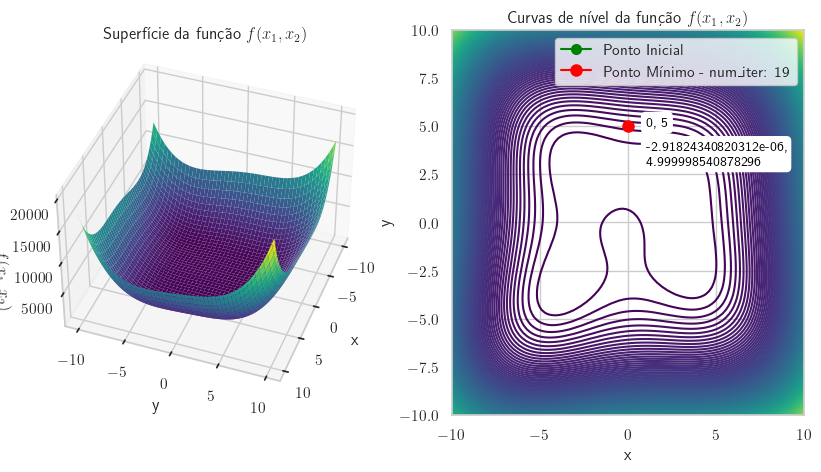

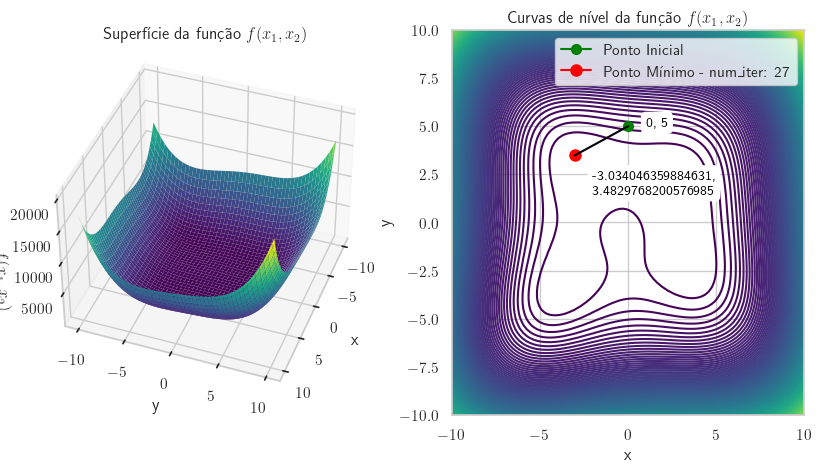

In [1]:
import sys
sys.path.append('../')

import warnings
warnings.filterwarnings('ignore')

import numpy as np

from utils.linear_search import constant_step, golden_section, bisection
from utils.plots import plot_optimization

def func(x):
    return (x[0]**2+x[1]-11)**2 + (x[0]+x[1]**2-7)**2

initial_point = np.array([0, 5])
direction = np.array([3, 1.5])

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = func([X, Y])

constant_st = constant_step(function=func, initial_point=initial_point, direction=direction)
plot_optimization(X, Y, Z, constant_st)

bisec = bisection(function=func, initial_point=initial_point, direction=direction)
plot_optimization(X, Y, Z, bisec)

golden_sec = golden_section(function=func, initial_point=initial_point, direction=direction)
plot_optimization(X, Y, Z, golden_sec)

In [2]:
print('Constant step iteratios: ', constant_st[2])
print('Bisection iteratios: ', bisec[2])
print('Golden section iteratios: ', golden_sec[2])

Constant step iteratios:  1000
Bisection iteratios:  19
Golden section iteratios:  27


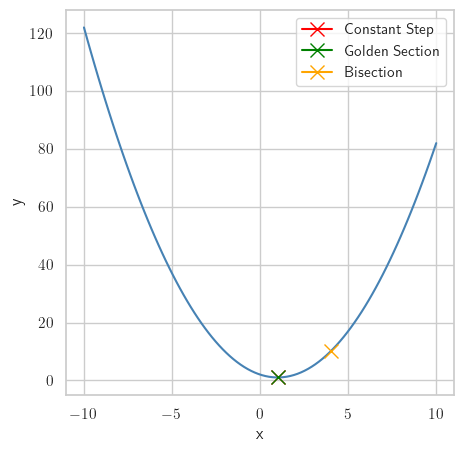

In [3]:
def func(x):
    return x**2 - 2*x + 2

constant_st = constant_step(function=func,initial_point=4, direction=-1)
golden_sec = golden_section(function=func, initial_point=4, direction=-1)
bisec = bisection(function=func, initial_point=4, direction=-1)

x = np.linspace(-10, 10, 100)
y = func(x)

import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5))
plt.plot(x, y, 'steelblue')
#plt.plot(golden_sec[0], golden_sec[1], color='red', markersize=10, marker='x', label = f'Ponto Mínimo')
plt.plot(constant_st[0], constant_st[1], color='red', markersize=10, marker='x', label = f'Constant Step')
plt.plot(golden_sec[0], golden_sec[1], color='green', markersize=10, marker='x', label = f'Golden Section')
plt.plot(bisec[0], bisec[1], color='orange', markersize=10, marker='x', label = f'Bisection')
plt.legend(loc = 'upper right')
plt.ylabel('y')
plt.xlabel('x')
plt.show()